<a href="https://colab.research.google.com/github/SERGEY11111111111111/HH2/blob/master/Project_2_%D0%9D%D0%BE%D1%83%D1%82%D0%B1%D1%83%D0%BA_%D1%88%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
table = "vacancies" #укажем название таблицы
query = f'''select count(*)
          from public.{table}  
        '''    #таблицу подставим в запрос
df = pd.read_sql_query(query, connection)
df

<ipython-input-4-209bcec2da30>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,49197


In [5]:
# 49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
table = 'employers' #новое название таблицы, можно было 
#              бы пройти все это в цикле, но не по условию
query = f'''select count(*)
          from public.{table}  
        '''    #таблицу подставим в запрос
df = pd.read_sql_query(query, connection)
df

<ipython-input-6-7b0b88044869>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,23501


In [7]:
# 23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
table = 'areas' #новое название таблицы
query = f'''select count(*)
          from public.{table}  
        '''    #таблицу подставим в запрос
df = pd.read_sql_query(query, connection)
df

<ipython-input-8-ac09818d988e>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,1362


In [9]:
# 1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
table = 'industries' #новое название таблицы
query = f'''select count(*)
          from public.{table}  
        '''    #таблицу подставим в запрос
df = pd.read_sql_query(query, connection)
df

<ipython-input-10-8212ceb24fdf>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,294


In [11]:
# 294

***

In [12]:
# существуют таблицы, связанные между собой, количество вакансий составляет 49,197
# которые размещены не более чем 23501 компанией (могут зарегистрироваться, но не оставить вакансии
# или просто ХХ добавляет компании, скорее всего компания не может оставить вакансию без регистрации)
# потенциально в 294 сферах деятельности и в 1362 регионах (не субъектов, а скорее всего более детализированных наименованиях местностей)

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
query = '''
select 
    count(*) cnt,
    a.name "area"
from public.vacancies v
left join public.areas a on a.id = v.area_id
group by a.id
order by count(*) desc
limit 5
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-13-ef028075b7de>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


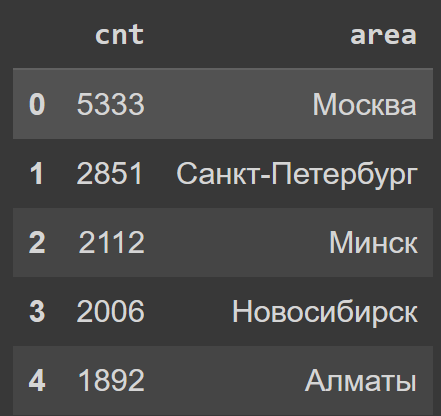

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
query = '''
select 
    count(*)
from public.vacancies 
where salary_from is not null
OR salary_to is not null
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-14-fd51702016b4>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,24073


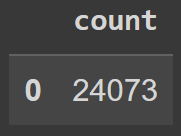

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [15]:
query = '''
select 
    round(avg(salary_from)),
    round(avg(salary_to))
from public.vacancies 
where salary_from is not null
OR salary_to is not null
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-15-9bc379961549>:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,round,round
0,71065.0,110537.0


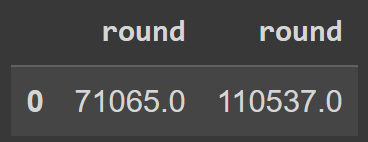

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [16]:
query = '''
select 
  count(*),
  schedule,
  employment
from public.vacancies 
group by schedule, employment
order by count(*) desc
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-16-ec374ec61b2d>:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


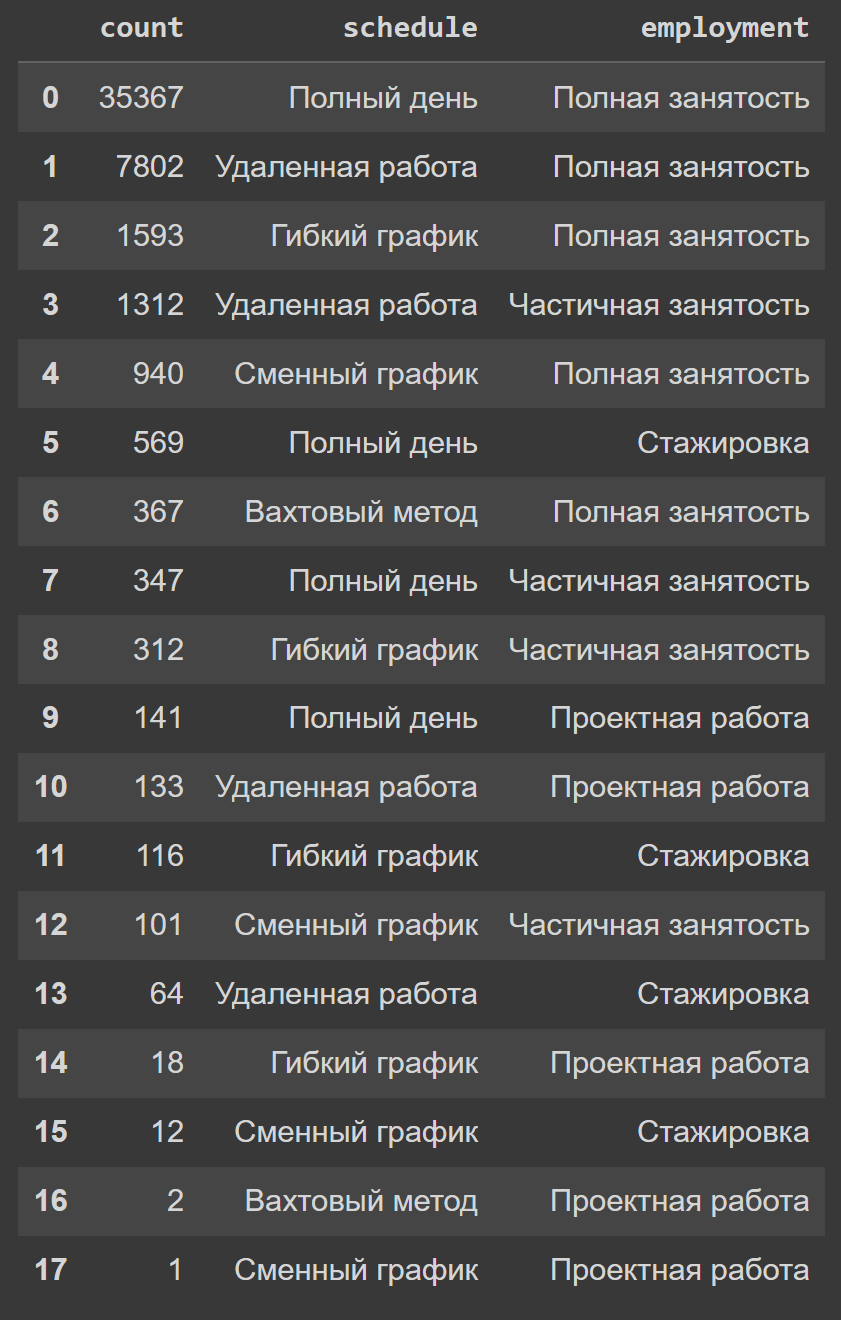

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [17]:
query = '''
select 
count(*),
experience
from public.vacancies 
group by experience
order by count(*) asc
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-17-4cce568816d1>:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


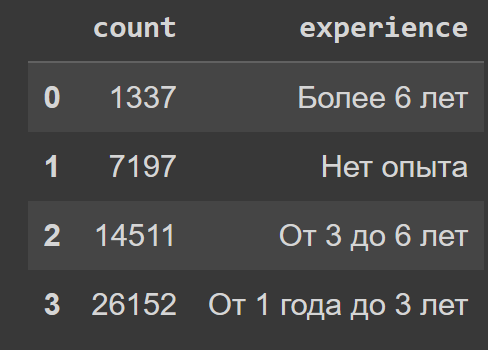

***

In [18]:
# 1. Наибольшее количество вакансий на портале размещены в крупнейших российских городах миллионниках, и крупнейших городах соседних государств
# 2. Большинство работодателей (но не подавляющее) указывают данные о зарплате
# 3. Средняя минимальная зп и средняя максимальная составляют примерно 71065	и 110537 соответственно
# 4. Наибольшее количество вакансий представлено работой полным графиком, причем в основном полный день
# 5. Для наибольшего количества вакансий требуется опыт работы от 1 до 3 лет

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [19]:
query = '''
select 
e.name,
count(*)
from public.vacancies v
left join public.employers e on v.employer_id = e.id 
group by e.id
order by count(*) desc
limit 5
'''
#объединяем таблицы по идентификатору работтодателя
df = pd.read_sql_query(query, connection)
df

<ipython-input-19-27646e7ba414>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


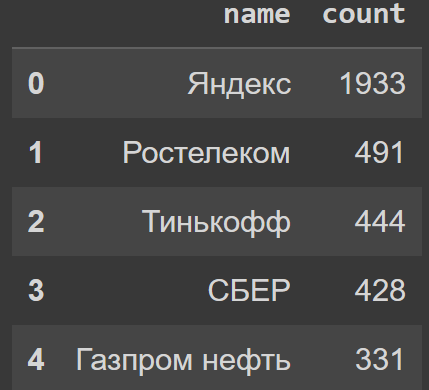

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [20]:
query = '''
select 
count(*),
a.name
from public.areas a
left join public.vacancies v on v.area_id= a.id
left join public.employers e on e.area = a.id
where v.id is null
group by a.id
order by count(*) desc
limit 1
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-20-4694e645169e>:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count,name
0,410,Россия


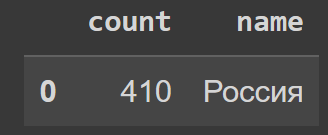

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [21]:
query = '''
select 
e.name,
count(distinct v.area_id) areas
from public.employers e
left join public.vacancies v on e.id = v.employer_id
group by e.id
order by count(v.area_id) desc
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-21-33c9219a1788>:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,areas
0,Яндекс,181
1,Ростелеком,152
2,Тинькофф,43
3,СБЕР,24
4,Газпром нефть,24
...,...,...
23496,МАКМАХ,0
23497,Завод Стелкон,0
23498,ИнтерЭВМ,0
23499,Фёдоров Михаил,0


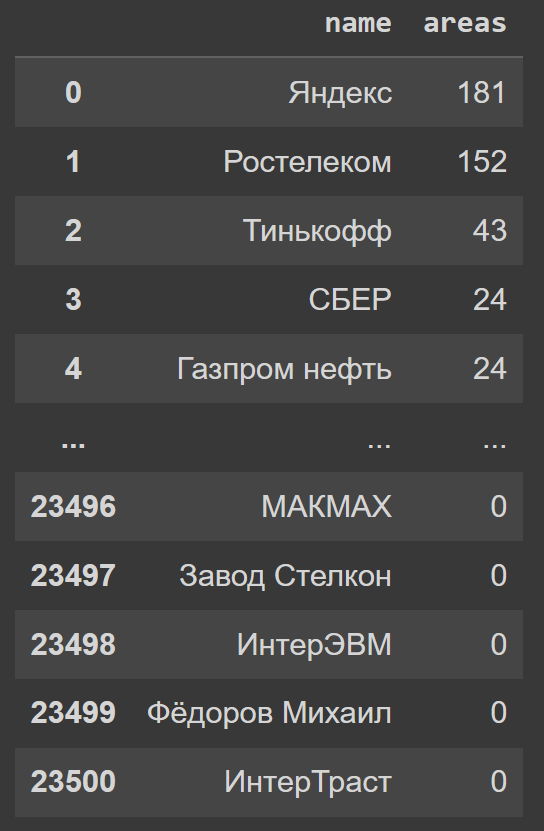

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [22]:
query = '''
select 
count(*)
from public.employers e
left join employers_industries ei on e.id = ei.employer_id
where ei.industry_id is null
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-22-c682a93eafa9>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,8419


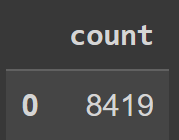

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [23]:
query = '''
select 
e.name
from public.employers e
left join employers_industries ei on e.id = ei.employer_id
group by e.id
having count(distinct industry_id) = 4
order by e.name
offset 2 limit 1
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-23-c093df52a2a2>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name
0,2ГИС


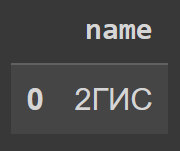

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [41]:
query = '''
select 
count(*)
from public.employers e
left join employers_industries ei on e.id = ei.employer_id
left join industries i on ei.industry_id = i.id
where i.name like 'Разработка программного обеспечения'
'''
#объединим таблицу и проведем сортировку
df = pd.read_sql_query(query, connection)
df

<ipython-input-41-09ce3dafd9f0>:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,3553


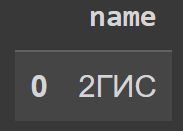

In [25]:
# 1. наибольшее количество вакансий имеется в компаниях активно развивающихся в скторе Ай-ТИ: Ростелеком, Яндекс, Сбер
# 2. При поверхностном взгляде количество вакансий всего и регионов размещения очень хорошо коррелируют друг с другом, что может говорить о том, 
# чтокрупные компании стараются развивать свой бизнес по всей стране
# 3. Наблюдается тенденция, что большинство крупных работодателей ведут деятельность в различных сферах

In [26]:
# текст запроса

In [27]:
# результат запроса

***

In [28]:
# выводы по анализу работодателей

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [29]:
query = '''
select 
count(*)
from public.vacancies
where lower(name) like '%data%'
or lower(name) like '%данн%'
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-29-3cf0b7df1241>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,1771


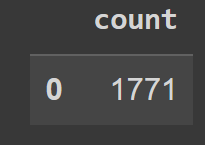

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [42]:
query = '''
select 
count(*)
from public.vacancies
where (lower(name) like '%data%scientist%'
or lower(name) like '%data%science%'
or lower(name) like '%исследователь%данных%'
or (name like '%ML%' and lower(name) not like '%html%')
or lower(name) like '%machine%learning%'
or lower(name) like '%машинн%обучен%')
'''
#посчитаем количество вакансий при условиях для начинающих специалистов в сфере дата-сайнс\
df = pd.read_sql_query(query, connection)
df

<ipython-input-42-ff4962beeb8f>:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,483


In [30]:
query = '''
select 
count(*)
from public.vacancies
where (lower(name) like '%data%scientist%'
or lower(name) like '%data%science%'
or lower(name) like '%исследователь%данных%'
or (name like '%ML%' and lower(name) not like '%html%')
or lower(name) like '%machine%learning%'
or lower(name) like '%машинн%обучен%')
and
(lower(name) like '%junior%'
or lower(experience) = 'нет опыта'
or lower(employment) = 'стажировка'
)
'''
#посчитаем количество вакансий при условиях для начинающих специалистов в сфере дата-сайнс\
df = pd.read_sql_query(query, connection)
df

<ipython-input-30-b7da63e465af>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,51


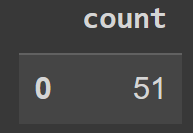

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [31]:
query = '''
select 
count(*)
from public.vacancies
where (lower(name) like '%data%scientist%'
or lower(name) like '%data%science%'
or lower(name) like '%исследователь%данных%'
or (name like '%ML%' and lower(name) not like '%html%')
or lower(name) like '%machine%learning%'
or lower(name) like '%машинн%обучен%')
and (key_skills like '%SQL%'
or lower(key_skills) like '%postgres%'
)
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-31-d9a9df61ad38>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,201


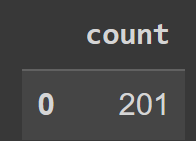

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [32]:
query = '''
select 
count(*)
from public.vacancies
where (lower(name) like '%data%scientist%'
or lower(name) like '%data%science%'
or lower(name) like '%исследователь%данных%'
or (name like '%ML%' and lower(name) not like '%html%')
or lower(name) like '%machine%learning%'
or lower(name) like '%машинн%обучен%')
and (key_skills like '%SQL%'
or lower(key_skills) like '%postgres%'
)
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-32-d9a9df61ad38>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,201


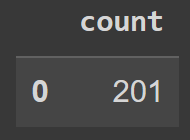

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [37]:
# навыки разделены табами, для того, чтобы посчитать сколько навыков нужно к кол-ву табов прибавить 1
# чтобы узнать сколько табов, уберем их и вычтем из количества символов строки с табами, кол-во символов в строке без табов
query = '''
select 
round(avg(length(key_skills) - length(replace(key_skills, CHR(9), ''))) + 1,2)
from public.vacancies
where (lower(name) like '%data%scientist%'
or lower(name) like '%data%science%'
or lower(name) like '%исследователь%данных%'
or (name like '%ML%' and lower(name) not like '%html%')
or lower(name) like '%machine%learning%'
or lower(name) like '%машинн%обучен%')
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-37-f8f809814f6f>:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,round
0,6.41


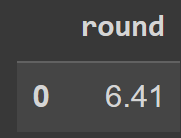

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [40]:
# воспользуемся тем, что деление на Нон дает Нон, в случае если получаем Нон передедим значение наименьшей зарплаты, если и там нет значения, то наивысшей
query = '''
select 
round(avg(coalesce((salary_from + salary_to)/ 2, salary_from, salary_to)),0) salary
from

public.vacancies
where (salary_from is not null
or salary_to is not null)
and
(lower(name) like '%data%scientist%'
or lower(name) like '%data%science%'
or lower(name) like '%исследователь%данных%'
or (name like '%ML%' and lower(name) not like '%html%')
or lower(name) like '%machine%learning%'
or lower(name) like '%машинн%обучен%')
group by experience
having experience = 'От 3 до 6 лет'
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-40-21bcf1409131>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,salary
0,243115.0


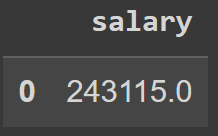

***

In [ ]:
#1.Как показал предметный анализ имеется достаточно низкое количество вакансий для начинающих специалистов в области науки о данных
# 51 из общего 483
#2.специалисты в этой сфере имеют конкурентные зароботные платы, но им необходимо владеть около 6 ключевыми навыками
#3. Основными из которых являются Python и SQL

# Общий вывод по проекту

Сравним зарплату в сфере науки о данных со средними зарплатами на ХХ

In [47]:
query = '''
select 
experience,
round(avg(coalesce((salary_from + salary_to)/ 2, salary_from, salary_to)),0) salary,
'DT' sphere
from

public.vacancies
where (salary_from is not null
or salary_to is not null)
and
(lower(name) like '%data%scientist%'
or lower(name) like '%data%science%'
or lower(name) like '%исследователь%данных%'
or (name like '%ML%' and lower(name) not like '%html%')
or lower(name) like '%machine%learning%'
or lower(name) like '%машинн%обучен%')
group by experience

Union 
select 
experience,
round(avg(coalesce((salary_from + salary_to)/ 2, salary_from, salary_to)),0) salary,
'Среднее по всем вакансиям' sphere
from

public.vacancies
where (salary_from is not null
or salary_to is not null)
group by experience


having experience not like 'Более 6 лет'
order by experience, sphere 
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-47-7ac58e012d8c>:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,experience,salary,sphere
0,Нет опыта,74643.0,DT
1,Нет опыта,40472.0,Среднее по всем вакансиям
2,От 1 года до 3 лет,139675.0,DT
3,От 1 года до 3 лет,76541.0,Среднее по всем вакансиям
4,От 3 до 6 лет,243115.0,DT
5,От 3 до 6 лет,133211.0,Среднее по всем вакансиям


Зарплаты в сфере дата-сайнс гораздо выше средних зарплат разрезах по опыту работы, и в каждом разрезе примерно соответствуют средней зарплате более высокой категории 

Выясним основных работодателей в сфере анализа данных

In [48]:
query = '''
select 
e.name,
count(*)
from vacancies v
left join employers e on v.employer_id = e.id

where (lower(v.name) like '%data%scientist%'
or lower(v.name) like '%data%science%'
or lower(v.name) like '%исследователь%данных%'
or (v.name like '%ML%' and lower(v.name) not like '%html%')
or lower(v.name) like '%machine%learning%'
or lower(v.name) like '%машинн%обучен%')
group by e.name
order by count(*) desc
limit 10
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-48-b7e92f0d72b3>:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,count
0,СБЕР,38
1,Bell Integrator,25
2,Банк ВТБ (ПАО),18
3,VK,15
4,Positive Technologies,11
5,Яндекс,9
6,EvenBet Gaming,9
7,МегаФон,8
8,Andersen,7
9,Ozon,6


Посмотрим на компании, привлекающие в основном молодых специалистов

In [49]:
query = '''
select 
e.name,
count(*)
from vacancies v
left join employers e on v.employer_id = e.id

where (lower(v.name) like '%data%scientist%'
or lower(v.name) like '%data%science%'
or lower(v.name) like '%исследователь%данных%'
or (v.name like '%ML%' and lower(v.name) not like '%html%')
or lower(v.name) like '%machine%learning%'
or lower(v.name) like '%машинн%обучен%')
and
(lower(v.name) like '%junior%'
or lower(v.experience) = 'нет опыта'
or lower(v.employment) = 'стажировка')
group by e.name
order by count(*) desc
limit 10
'''
df = pd.read_sql_query(query, connection)
df

<ipython-input-49-8e43ade62056>:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,count
0,Банк ВТБ (ПАО),10
1,Comexp,3
2,The Skolkovo Institute of Science and Technology,3
3,SteadyControl,2
4,"СтарЛайн, Научно-производственное объединение",2
5,Диплей,2
6,Seldon,1
7,DNS Головной офис,1
8,VK,1
9,Pay P.S.,1


Как видно основные лидеры по количеству вакансий стараются привлекать уже специалистов с опытом, что свидетельствует о разных стратегиях найма персонала у компаний

Обобщим выводы:
- наука о данных является высокооплачиваемой сферой
- для успешного трудоустройства в которой нужно обладать многими навыками
- однако, стратегии найма персонала большинства крупных компаний весьма неблагоприятны, для начинающих специалистрв

In [50]:
connection.close()